In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (14,7)

In [27]:
display(df.head(5))

,Title,OtherColumn
0,Study on the effects of anxiety and depression...,1
1,Technology for mental health support: a review,2
2,Design of a new intervention for cognitive dis...,3
3,Analysis of social media impact on mental health,4
4,Behavioral patterns in patients with chronic s...,5


In [28]:
df = pd.read_excel("preprocessed.xlsx")
df.head(10)

,Title,OtherColumn
0,Study on the effects of anxiety and depression...,1
1,Technology for mental health support: a review,2
2,Design of a new intervention for cognitive dis...,3
3,Analysis of social media impact on mental health,4
4,Behavioral patterns in patients with chronic s...,5
5,Review of treatment options for bipolar disorder,6
6,Exploring the digital healthcare landscape for...,7
7,Data-driven insights into pediatric anxiety di...,8
8,The role of physical activity in stress manage...,9
9,Predicting outcomes in psychiatric conditions ...,10


In [29]:
import pandas as pd

# Create a sample DataFrame with a 'Title' column
sample_data = {
    'Title': [
        'Study on the effects of anxiety and depression in young adults',
        'Technology for mental health support: a review',
        'Design of a new intervention for cognitive disorders',
        'Analysis of social media impact on mental health',
        'Behavioral patterns in patients with chronic stress',
        'Review of treatment options for bipolar disorder',
        'Exploring the digital healthcare landscape for elderly',
        'Data-driven insights into pediatric anxiety disorders',
        'The role of physical activity in stress management',
        'Predicting outcomes in psychiatric conditions using machine learning'
    ],
    'OtherColumn': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
df_sample = pd.DataFrame(sample_data)

# Save the sample DataFrame to an Excel file
df_sample.to_excel('preprocessed.xlsx', index=False)

print("Sample 'preprocessed.xlsx' created successfully.")

Sample 'preprocessed.xlsx' created successfully.


In [30]:
import pandas as pd
df = pd.read_excel("preprocessed.xlsx")
df.head(10)

,Title,OtherColumn
0,Study on the effects of anxiety and depression...,1
1,Technology for mental health support: a review,2
2,Design of a new intervention for cognitive dis...,3
3,Analysis of social media impact on mental health,4
4,Behavioral patterns in patients with chronic s...,5
5,Review of treatment options for bipolar disorder,6
6,Exploring the digital healthcare landscape for...,7
7,Data-driven insights into pediatric anxiety di...,8
8,The role of physical activity in stress manage...,9
9,Predicting outcomes in psychiatric conditions ...,10


In [44]:
from google.colab import files

uploaded = files.upload()

In [25]:
import pandas as pd
df = pd.read_excel("preprocessed.xlsx")
df.head(10)

,Title,OtherColumn
0,Study on the effects of anxiety and depression...,1
1,Technology for mental health support: a review,2
2,Design of a new intervention for cognitive dis...,3
3,Analysis of social media impact on mental health,4
4,Behavioral patterns in patients with chronic s...,5
5,Review of treatment options for bipolar disorder,6
6,Exploring the digital healthcare landscape for...,7
7,Data-driven insights into pediatric anxiety di...,8
8,The role of physical activity in stress manage...,9
9,Predicting outcomes in psychiatric conditions ...,10


In [31]:

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [32]:
tfidf = TfidfVectorizer(
    min_df = 1, # Changed from 5 to 1
    max_df = 1.0, # Changed from 0.95 to 1.0
    # max_features = 8000, # Removed max_features as it's too restrictive for small datasets
    stop_words = 'english'
)
tfidf.fit(df.Title)
text = tfidf.transform(df.Title)

Fitting 2 clusters
Fitting 4 clusters
Fitting 6 clusters
Fitting 8 clusters
Fitting 10 clusters


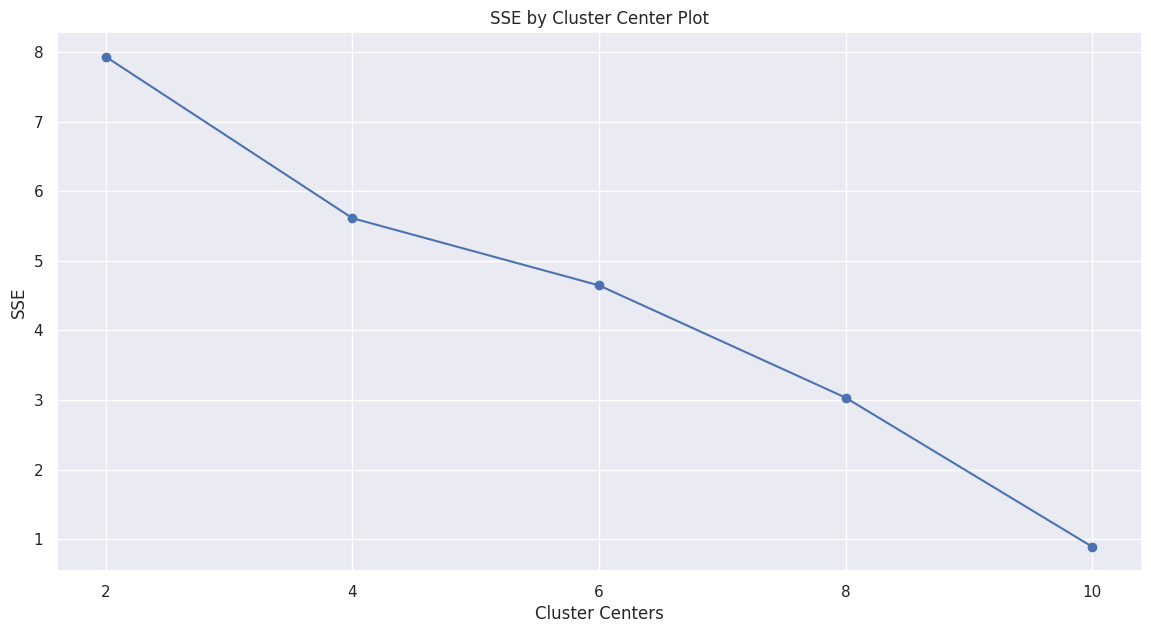

In [33]:
def generate_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)

    sse = []
    for k in iters:
        # Ensure n_clusters does not exceed n_samples
        if k > data.shape[0]:
            print(f'Skipping k={k} as it exceeds the number of samples ({data.shape[0]})')
            continue
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fitting {} clusters'.format(k))

    f, ax = plt.subplots(1, 1)
    ax.plot(iters[:len(sse)], sse, marker='o') # Adjust iters length for plotting
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters[:len(sse)])
    ax.set_xticklabels(iters[:len(sse)])
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    plt.show() # Added to ensure plot is displayed

generate_optimal_clusters(text, text.shape[0]) # Set max_k to be at most the number of samples

In [34]:
clusters = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

Text(0.5, 1.0, 'Generated TSNE Cluster Plot')

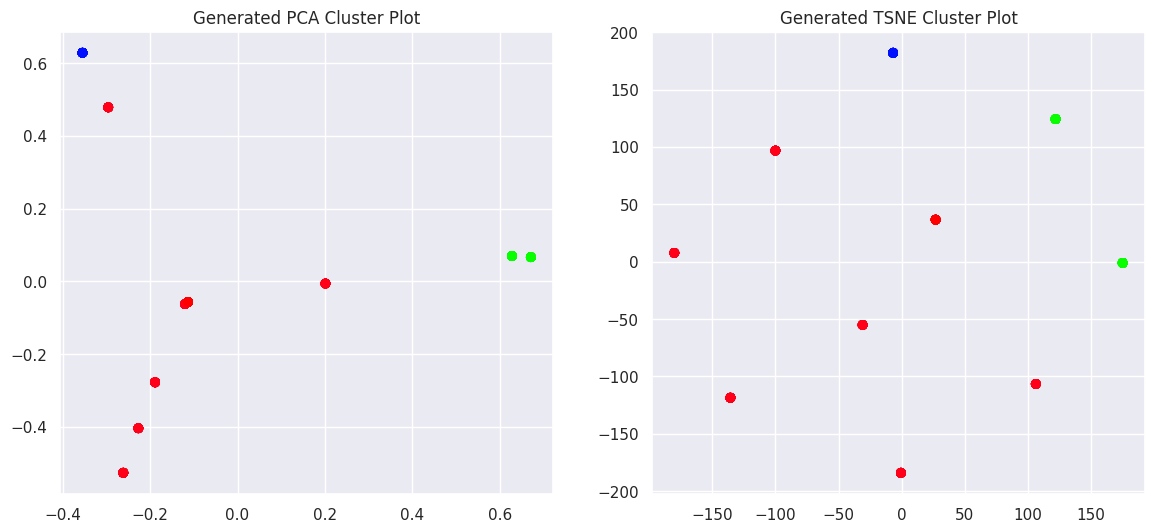

In [35]:
clusters = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)
max_label = max(clusters)
max_items = np.random.choice(range(text.shape[0]), size=3000, replace=True)
# Convert np.matrix to np.array as it's no longer supported by scikit-learn
pca = PCA(n_components=2).fit_transform(np.asarray(text[max_items,:].todense()))
tsne = TSNE().fit_transform(PCA(n_components=49).fit_transform(np.asarray(text[max_items,:].todense())))

idx = np.random.choice(range(pca.shape[0]), size=300, replace=True)
label_subset = clusters[max_items]
label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]

f, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
ax[0].set_title('Generated PCA Cluster Plot')

ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
ax[1].set_title('Generated TSNE Cluster Plot')

Cluster 0 

activity,adults,analysis,anxiety,behavioral,bipolar,chronic,cognitive,conditions,data,depression,design,disorder,disorders,driven,effects,new,health,insights,impact,intervention,management,machine,learning,options,mental,media,physical,pediatric,patterns,patients,outcomes,young,social,stress,study,support,predicting,psychiatric,review,role,technology,treatment,using,digital,elderly,exploring,healthcare,landscape
Cluster 1 

activity,adults,anxiety,behavioral,chronic,bipolar,cognitive,conditions,digital,data,depression,design,disorders,disorder,driven,effects,options,elderly,exploring,healthcare,intervention,insights,learning,landscape,machine,new,management,physical,pediatric,patterns,patients,outcomes,treatment,stress,study,using,young,predicting,psychiatric,role,review,analysis,impact,media,social,technology,support,health,mental
Cluster 2 

adults,analysis,anxiety,behavioral,chronic,bipolar,cognitive,conditions,digital,data,depression,design,disorders,disorder,driven,eff

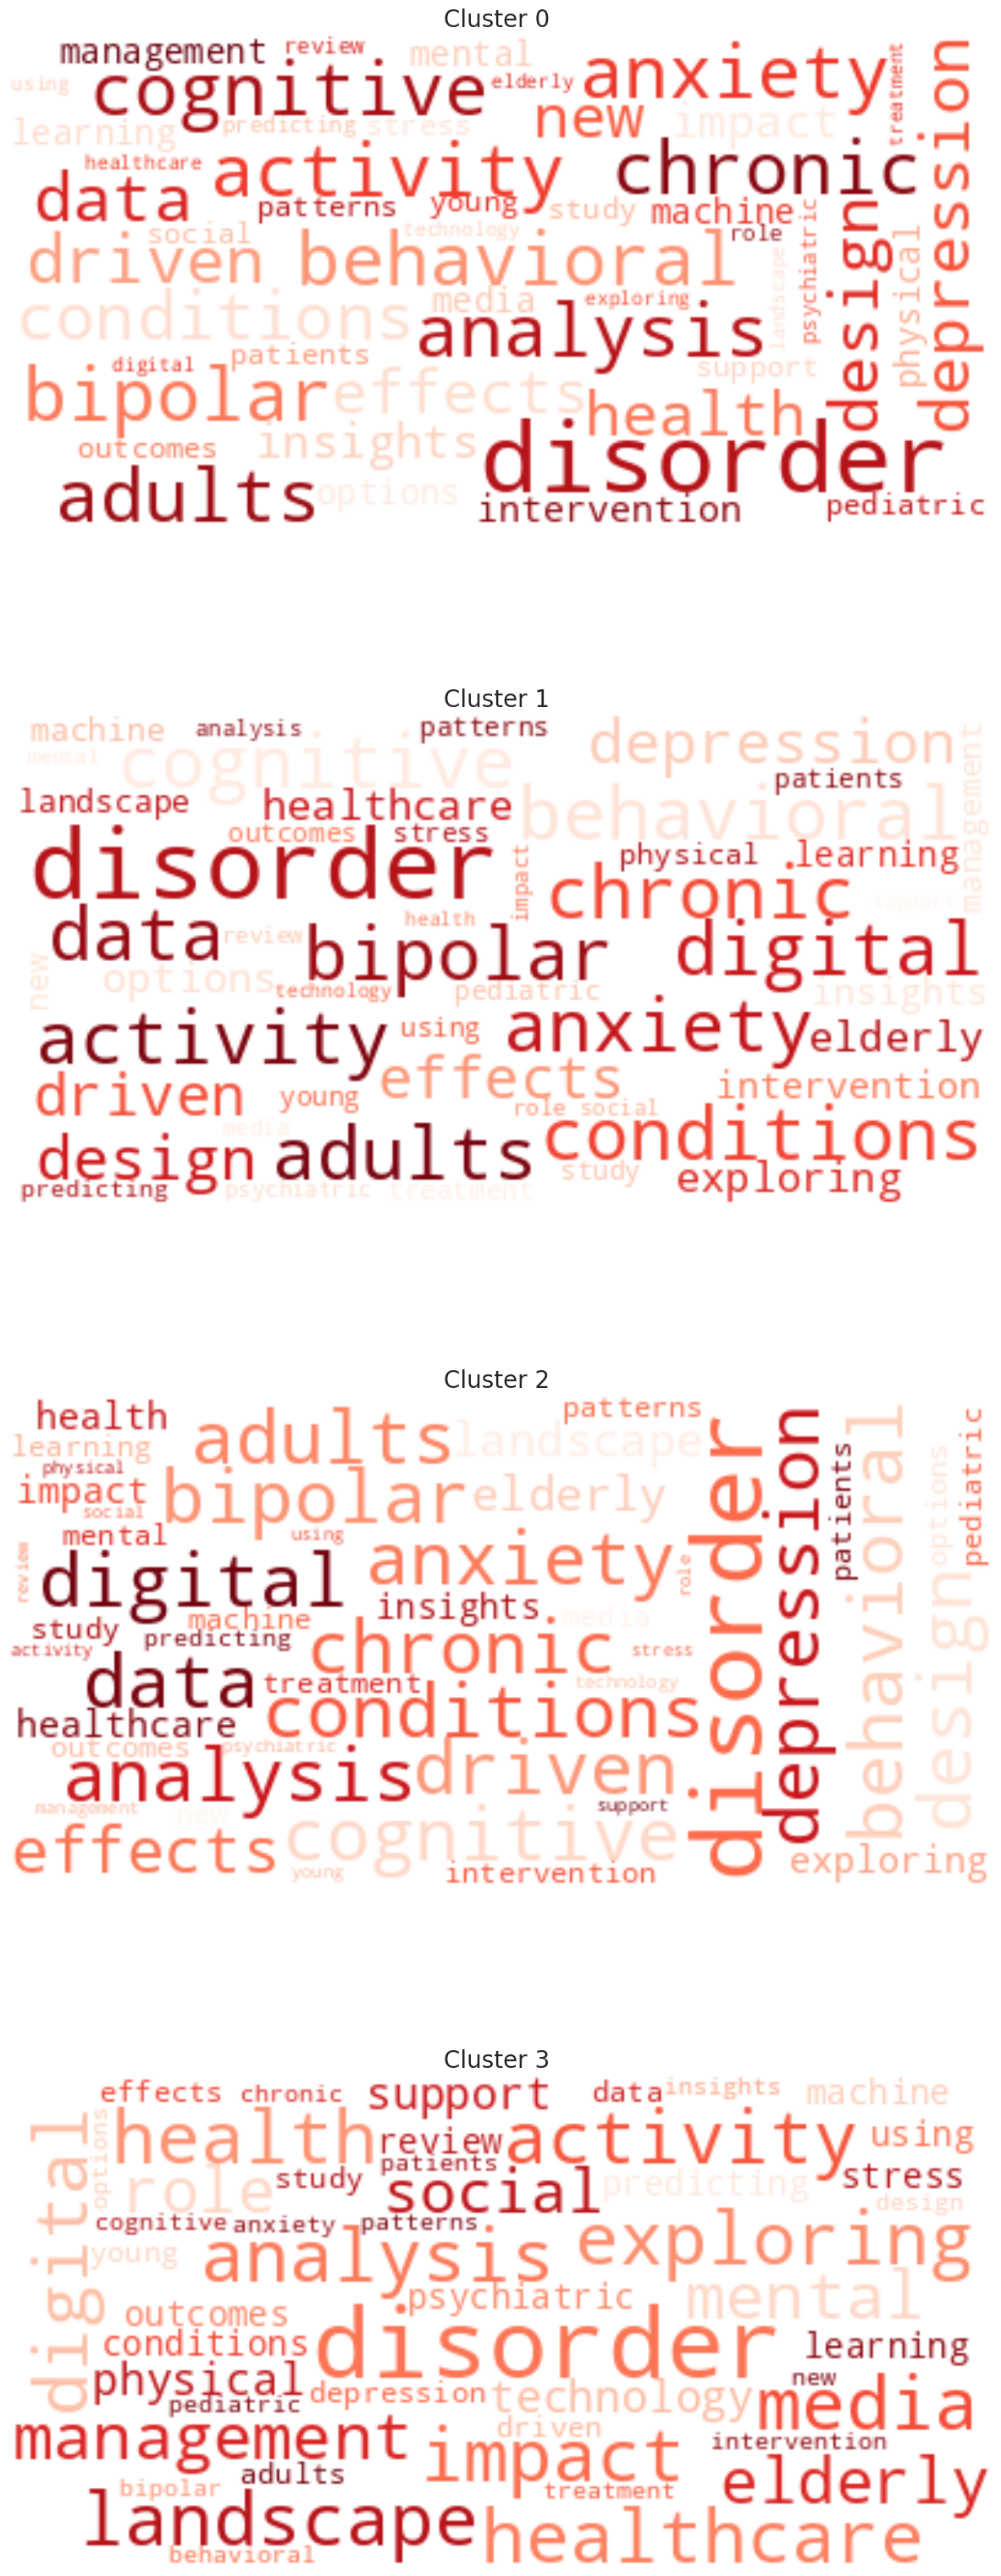

In [38]:
from wordcloud import WordCloud

fig, ax = plt.subplots(4, sharex=True, figsize=(15,10*4))

plt.rcParams["axes.grid"] = False

def high_frequency_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()

    for i,r in df.iterrows():
      words = ','.join([labels[t] for t in np.argsort(r)[-n_terms:]])
      print('Cluster {} \n'.format(i))
      print(words)
      wordcloud = WordCloud(max_font_size=40, collocations=False, colormap = 'Reds', background_color = 'white').generate(words)
      ax[i].imshow(wordcloud, interpolation='bilinear')
      ax[i].set_title('Cluster {} '.format(i), fontsize = 20)
      ax[i].axis('off')
    plt.show() # Added to explicitly show the plot
high_frequency_keywords(text, clusters, tfidf.get_feature_names_out(), 50)